<h1 style="font-size:4vw;color:#ad70e6;"> Financial Analytics Lab <span style="font-size:3vw;color:black;"> Assignment 7 <span> </h1>

<h2 style="font-size:1.5vw"> Group 6 </h2>
<span style="font-size:1vw">
Pritam Mallick   [18CS10042] <br/>
Rohit Jonwal     [18CS10046] <br/>
Sigangsa Baglari [18EC3FP11] <br/>
G Vishnu Vamshi  [19EE10023]
</span>
<br/> <br/>

<h2 style="font-size:1.5vw"> Objective </h2>

In this assignment, our objective is to predict and analyze long term volatility of Microsoft Stock Price Returns. Volatility is an investment term that describes when a market or security experiences periods of unpredictable, and sometimes sharp, price movements.

In this code segment, we are importing necessary modules and visualizing the data in a Tabular format after <b>normalisation</b>.

In [584]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot
import math

In [585]:
msftData = pd.read_csv('MSFT.csv', index_col='Date', parse_dates=True)
msftData = msftData.dropna()
msftData

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,37.349998,37.400002,37.099998,37.160000,31.798311,30632200
2014-01-03,37.200001,37.220001,36.599998,36.910000,31.584394,31134800
2014-01-06,36.849998,36.889999,36.110001,36.130001,30.916945,43603700
2014-01-07,36.330002,36.490002,36.209999,36.410000,31.156536,35802800
2014-01-08,36.000000,36.139999,35.580002,35.759998,30.600327,59971700
...,...,...,...,...,...,...
2022-03-04,294.290009,295.660004,287.170013,289.859985,289.859985,32356500
2022-03-07,288.529999,289.690002,278.529999,278.910004,278.910004,43157200
2022-03-08,277.799988,283.959991,270.000000,275.850006,275.850006,48159500


<h2 style="font-size:1.5vw"> Data </h2>

The MSFT Stock dataset consists of Open, Close and Adj Close values over a span
of many years. However, in this assignment, the time-series data analysis of <b> Stock Returns </b> is our primary focus. In this code segment, we are visualizing the data in a Time-series chart.

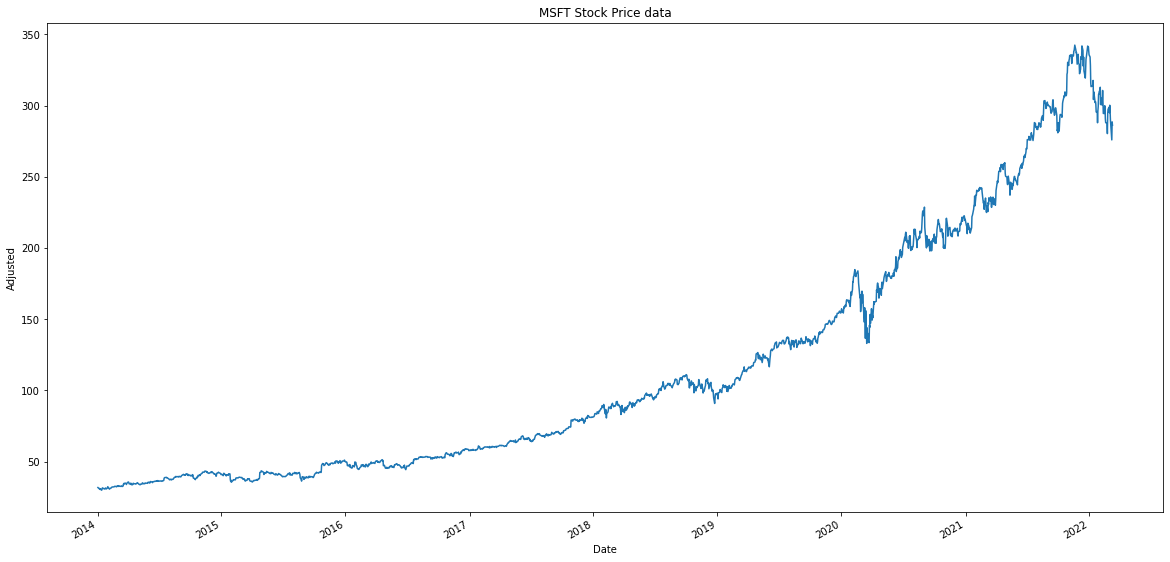

In [586]:
f = pyplot.figure()
f.set_figwidth(20)
f.set_figheight(10)

msftData['Adj Close'].plot()
pyplot.xlabel("Date")
pyplot.ylabel("Adjusted")
pyplot.title("MSFT Stock Price data")
pyplot.show()

We calculate Stock Returns by finding out the percentage change in each subsequent stock price and then normalizing the data for further analysis.

In [587]:
msft_daily_returns = msftData['Adj Close'].pct_change()
msft_daily_returns = msft_daily_returns.dropna()

for column in msft_daily_returns:
    msft_daily_returns = msft_daily_returns  / msft_daily_returns.abs().max()

msft_daily_returns

Date
2014-01-03   -0.045643
2014-01-06   -0.143376
2014-01-07    0.052578
2014-01-08   -0.121121
2014-01-09   -0.043639
                ...   
2022-03-04   -0.138941
2022-03-07   -0.256304
2022-03-08   -0.074437
2022-03-09    0.311135
2022-03-10   -0.055266
Name: Adj Close, Length: 2061, dtype: float64

In [588]:
volatility = msft_daily_returns.std()*252**.5
volatility

1.7845753703663505

Plotting the chart of Stock Returns

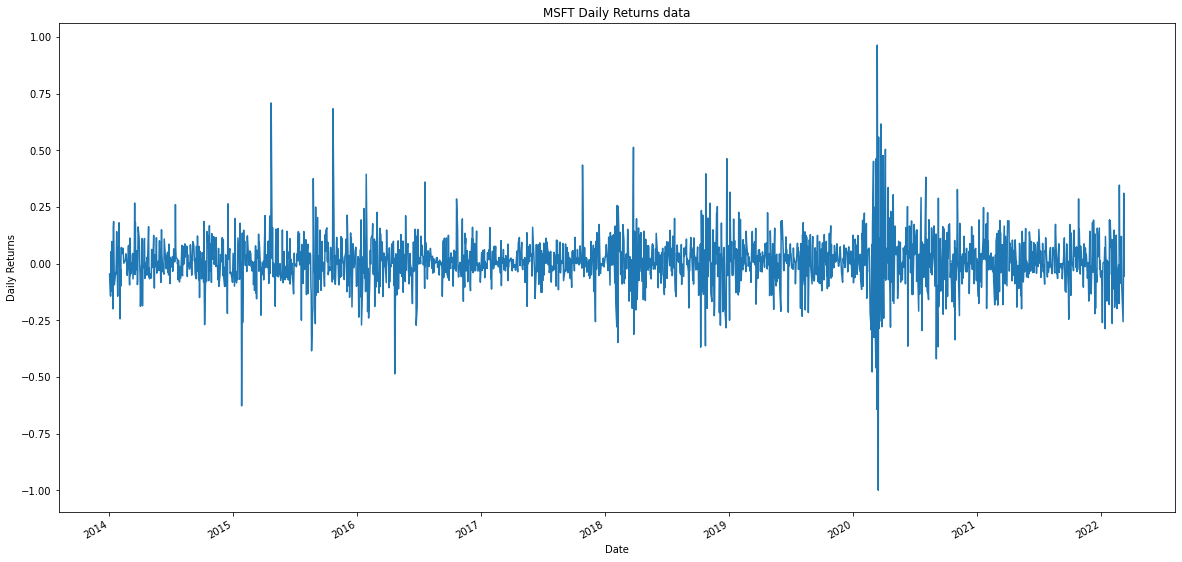

In [589]:
f = pyplot.figure()
f.set_figwidth(20)
f.set_figheight(10)

msft_daily_returns.plot()
pyplot.xlabel("Date")
pyplot.ylabel("Daily Returns")
pyplot.title("MSFT Daily Returns data")
pyplot.show()

<b>NOTE:</b> By plotting the squared of stock returns we can figure out that there exists high volatility whenever we observe a high change in stock returns.

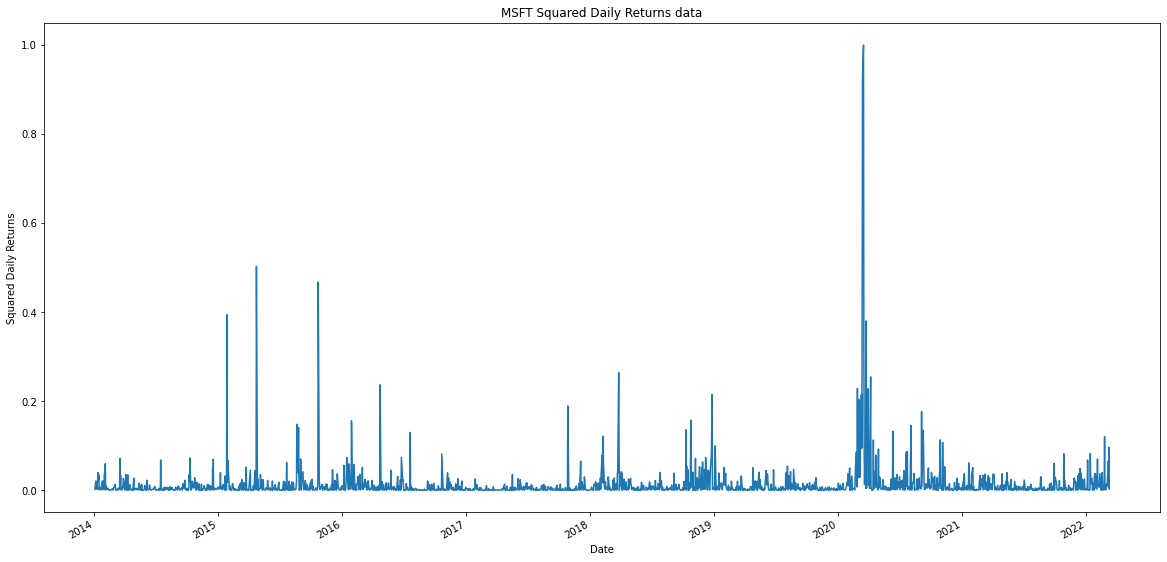

In [590]:
msft_daily_returns_sq = msft_daily_returns.mul(msft_daily_returns)

f = pyplot.figure()
f.set_figwidth(20)
f.set_figheight(10)

msft_daily_returns_sq.plot()
pyplot.xlabel("Date")
pyplot.ylabel("Squared Daily Returns")
pyplot.title("MSFT Squared Daily Returns data")
pyplot.show()

<h2 style="font-size:1.5vw"> Partial Autocorrelation </h2>

As we can see, the autocorrelation is almost absent in the Sstock Returns data, we can safely proceed to use ARCH model to predict volatility.

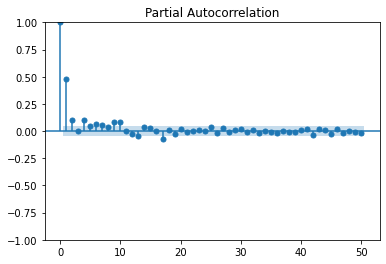

In [591]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(msft_daily_returns_sq[1:], lags=50, method="ols")
pyplot.show()

We split the Stock Returns data into Training and Testing datasets, the later consisting of 100 data points.

In [592]:
msft_daily_returns = msft_daily_returns.mul(10)
test_size = 100

train = msft_daily_returns.iloc[: -test_size]
test = msft_daily_returns.iloc[-test_size :]
print(train.shape, test.shape)
print('Training Data', train)
print('Testing Data', test)

(1961,) (100,)
Training Data Date
2014-01-03   -0.456428
2014-01-06   -1.433761
2014-01-07    0.525781
2014-01-08   -1.211211
2014-01-09   -0.436394
                ...   
2021-10-11   -0.142665
2021-10-12   -0.311307
2021-10-13    0.794573
2021-10-14    1.474589
2021-10-15    0.327194
Name: Adj Close, Length: 1961, dtype: float64
Testing Data Date
2021-10-18    0.686928
2021-10-19    0.207543
2021-10-20   -0.180502
2021-10-21    0.739369
2021-10-22   -0.349328
                ...   
2022-03-04   -1.389413
2022-03-07   -2.563045
2022-03-08   -0.744369
2022-03-09    3.111347
2022-03-10   -0.552655
Name: Adj Close, Length: 100, dtype: float64


<h2 style="font-size:1.5vw"> ARCH Model </h2>

In econometrics, the autoregressive conditional heteroskedasticity (ARCH) model is a statistical model for time series data that describes the variance of the current error term or innovation as a function of the actual sizes of the previous time periods' error terms, often the variance is related to the squares of the previous innovations. The ARCH model is appropriate when the error variance in a time series follows an autoregressive (AR) model, if an autoregressive moving average (ARMA) model is assumed for the error variance, the model is a generalized autoregressive conditional heteroskedasticity (GARCH) model.

In [593]:
from arch import arch_model

model_arch1 = arch_model(train[1:], mean="Constant", vol="ARCH", p=1)
results_arch1 = model_arch1.fit()
results_arch1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 9313.297877871535
Iteration:      2,   Func. Count:     13,   Neg. LLF: 4241.946275801791
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2821.856476116909
Iteration:      4,   Func. Count:     26,   Neg. LLF: 2821.578771012769
Iteration:      5,   Func. Count:     31,   Neg. LLF: 2821.576969884362
Iteration:      6,   Func. Count:     34,   Neg. LLF: 2821.576969884364
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2821.576969884362
            Iterations: 6
            Function evaluations: 34
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2821.58
Distribution:                  Normal   AIC:                           5649.15
Method:            Maximum Likelihood   BIC:                           5665.90
                                        No. Observations:                 1960
Date:                Fri, Mar 11 2022   Df Residuals:                     1959
Time:                        04:28:18   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0991  2.255e-02      4.393  1.116e-05 [5.487e-02,  0.143]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.7605  7.177e-02     10.597  3.088e-26 [  0.620,  0.901]
alpha[1]       0.4006  8.009e-02      5.002  5.661e-07 [  0.244,  0.558]
========================================================================

Covariance estimator: robust
"""

<b>NOTE:</b> As we can see that <b>omega</b> and <b>alpha[1]</b> has high t-statistic values, so we can say that they are statistically significant for the volatility equation. <b>mu</b> from the mean equation is also statistically significant. We get the <b> Adj. R-squared = 0 </b> as expected, because there exists nothing that explains the volatility, observed from negligible autocorrelation.

In [594]:
volatility = msft_daily_returns.rolling(window=2).std() * np.sqrt(2)

We hereby forecast 100 future values of volatility and compare them with the Testing dataset.

In [595]:
start = len(train)
end = len(train) + len(test) - 1
var_predictions = results_arch1.forecast(horizon=len(test), reindex="True")
predictions = var_predictions.residual_variance.values[-1,:]

In [596]:
predictions = pd.DataFrame(predictions, columns = ['Predicted Volatility'], index = test.index)

Plotting the predicted volatility vs test dataset.

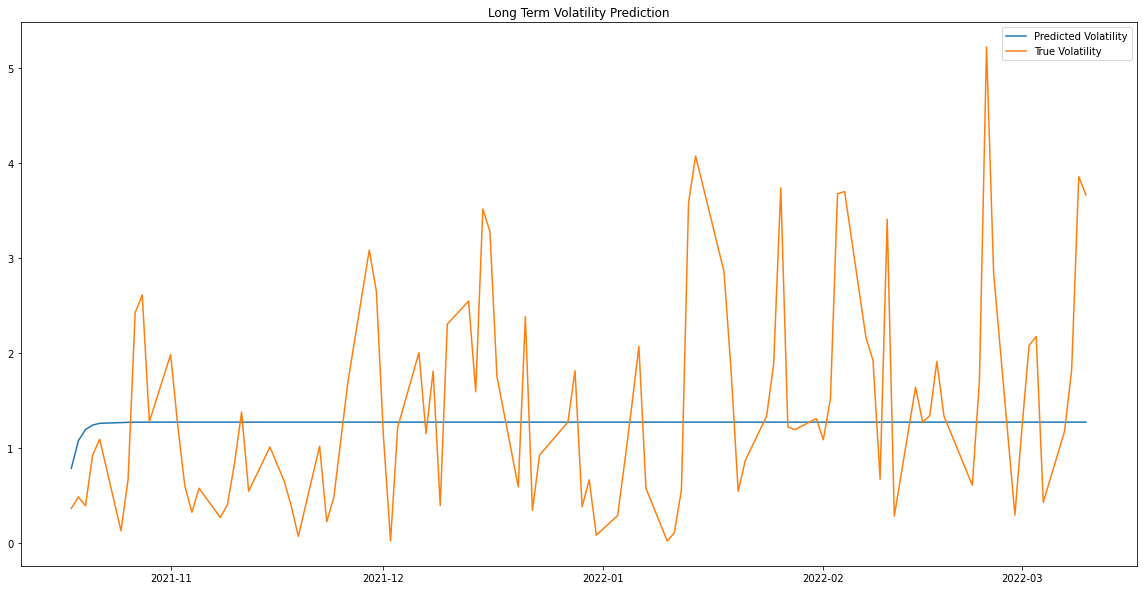

In [597]:
f = pyplot.figure()
f.set_figwidth(20)
f.set_figheight(10)

pyplot.plot(predictions)
pyplot.plot(volatility.iloc[-test_size:])
pyplot.title('Long Term Volatility Prediction')
pyplot.legend(['Predicted Volatility', 'True Volatility'])
pyplot.show()

<h2 style="font-size:1.5vw"> Improvised ARCH Model </h2>

In order to improvise the results of our trained ARCH model, we employ the rolling predictions method to find the best fit model for forecasting volatility.

In [598]:
import warnings

warnings.filterwarnings('ignore')
rolling_predictions = []
for i in range(test_size):
    train = msft_daily_returns[:-(test_size-i)]
    model = arch_model(train[1:], mean="Constant", vol="ARCH", p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

<b>NOTE:</b> Here we can observe an improvised forecast of volatility.

<Figure size 1440x720 with 0 Axes>

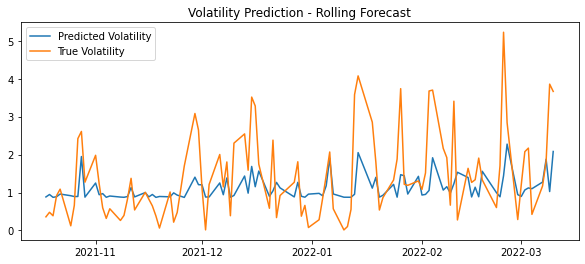

In [599]:
f = pyplot.figure()
f.set_figwidth(20)
f.set_figheight(10)

rolling_predictions = pd.DataFrame(rolling_predictions, columns = ['Predicted Volatility'], index = test.index)

pyplot.figure(figsize=(10,4))
preds, = pyplot.plot(rolling_predictions)
true, = pyplot.plot(volatility[-test_size:])
pyplot.title('Volatility Prediction - Rolling Forecast')
pyplot.legend(['Predicted Volatility','True Volatility'])

<h2 style="font-size:1.5vw"> Conclusion </h2>

The ARCH Forecating Model does not say anything about the Stock Price Returns of the market, but rather forecasts it's volatility, which in turn provides a better understanding of the market during huge dynamics. Zero Auto-correlation obatined from PACF Test allowed us to directly ARCH(1) for volatility with constant mean function. The Rolling Prdeictions approach helped us obtain a better view of future volatility. 

<h2 style="font-size:1.5vw"> References </h2>

<a href="https://docs.google.com/spreadsheets/d/1wueYcx6mmyzDHBoiTjHreivsmJ_GbFa87PPBZfNIvDc/edit?usp=sharing" target="_blank" > MSFT Stock Price Data </a> <br/>
<a href="https://finance.yahoo.com/quote/MSFT?p=MSFT&.tsrc=fin-srch" target="_blank" > Data Source </a>